In [1]:
#%%
import time
import json
import numpy as np
import pandas as pd
from pandas import json_normalize

import datetime

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#Scatterplot and Correlation Matrix - Kaustubh
#Frequency Tables - Jonathan and Stephanie
#Naiyu - histograms

In [2]:
#%%
def load_df(csv_path, nrows = None):
    json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
    df = pd.read_csv(csv_path,
                     #converters are dict of functions for converting values in certain columns. Keys can either be integers or column labels.
                     #json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary.
                     #It is mainly used for deserializing native string, byte, or byte array which consists of JSON data into Python Dictionary.
                     converters = {col: json.loads for col in json_cols},                                                                         
                         dtype = {'fullVisitorId': 'str'}, # Important!!
                         nrows = nrows)
    for col in json_cols:
        # for each column, flatten data frame such that the values of a single col are spread in different cols
        # This will use subcol as names of flat_col.columns
        flat_col = json_normalize(df[col])
        # Name the columns in this flatten data frame as col.subcol for tracability
        flat_col.columns = [f"{col}.{subcol}" for subcol in flat_col.columns]
        # Drop the json_col and instead add the new flat_col
        df = df.drop(col, axis = 1).merge(flat_col, right_index = True, left_index = True)
    return df


csv_train_path = 'train.csv'
csv_test_path = 'test.csv'

train = load_df(csv_train_path, nrows = 100000)
# test = load_df(csv_test_path, nrows = 30000)
train.shape
# %%

(100000, 55)

# Histograms

In [3]:
train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype('float')

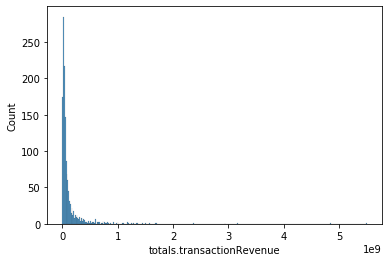

In [5]:
sns.histplot(data=train, x="totals.transactionRevenue")

Make a natural log transformation:

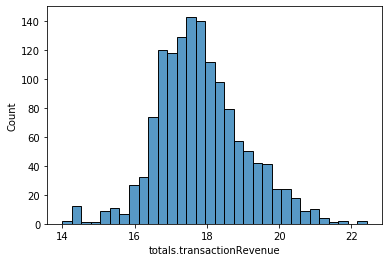

In [6]:
target = np.log(train['totals.transactionRevenue'])
sns.histplot(target)

After the natural log transformation, the distribution of the response variable looks alike a normal distribution. 